Here we present a simple example of how to use transfer learning with sentence transformers.

Make sure you run `pip install sentence-transformers` before running the code below.


In [1]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

/Users/njwfish/miniforge3/envs/pytorch/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small, fast model good for demos

## Clustering Example

In [3]:
# Generate a toy dataset with two categories: pet and finance
pet_documents = [
    "I love playing with my dog in the park",
    "The cat sleeps peacefully on the windowsill",
    "My dog enjoys running in the garden",
    "Cats are very independent pets",
    "Taking my puppy for daily walks",
    "The kitten plays with yarn all day",
    "Dogs need regular exercise and training",
    "My cat purrs when I pet her",
    "Feeding time is my pet's favorite",
    "Playing fetch with pets is fun"
]

finance_documents = [
    "The stock market crashed today",
    "Bitcoin prices are very volatile",
    "Investors lost money in the downturn",
    "Bull market continues its upward trend",
    "Trading volume hits record high",
    "Cryptocurrency adoption is growing",
    "Market analysts predict recession",
    "Stock indices reach new peaks",
    "Investment strategies for beginners",
    "Financial markets remain uncertain"
]

# Create balanced dataset with 50 examples of each category
# Using random variations with noise words to create more diversity
import random

def add_noise_to_text(text):
    noise_words = [
        "today", "yesterday", "recently", "definitely", "absolutely",
        "quite", "very", "extremely", "somewhat", "rather"
    ]
    words = text.split()
    # 50% chance to add a noise word at the start
    if random.random() > 0.5:
        words.insert(0, random.choice(noise_words))
    # 50% chance to add a noise word at the end
    if random.random() > 0.5:
        words.append(random.choice(noise_words))
    return " ".join(words)

documents = []
for _ in range(50):  # 50 examples of each category
    documents.append(add_noise_to_text(random.choice(pet_documents)))
    documents.append(add_noise_to_text(random.choice(finance_documents)))

# Shuffle the documents
random.shuffle(documents)

/Users/njwfish/miniforge3/envs/pytorch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


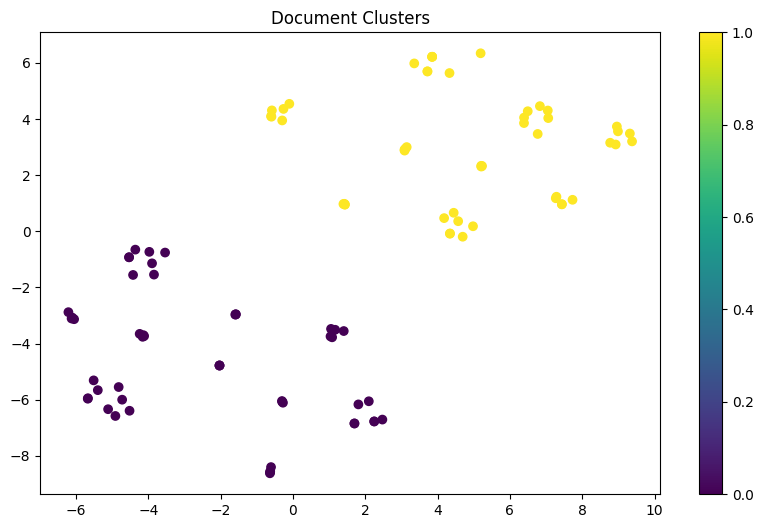

In [4]:
# Generate embeddings
embeddings = model.encode(documents)

# Perform K-means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')
plt.title('Document Clusters')
plt.colorbar(scatter)
plt.show()

## Sentiment Analysis Example

In [5]:
# Base sentiment examples
positive_reviews = [
    "I love this product, it's amazing!",
    "Great experience, highly recommend",
    "Absolutely fantastic service",
    "Best purchase I've ever made",
    "The quality exceeded my expectations",
    "Customer service was outstanding",
    "Works perfectly for my needs",
    "Really happy with this purchase",
    "Great value for money",
    "Would definitely buy again"
]

negative_reviews = [
    "This is terrible, don't buy it",
    "Waste of money, very disappointed",
    "Poor quality and bad customer service",
    "Completely failed to meet expectations",
    "Would not recommend to anyone",
    "Save your money and avoid this",
    "Terrible experience overall",
    "Product broke after first use",
    "Customer support was unhelpful",
    "Not worth the price at all"
]

# Generate balanced dataset with variations
texts = []
labels = []
num_examples = 50  # 50 examples of each sentiment

for _ in range(num_examples):
    # Add positive example
    texts.append(add_noise_to_text(random.choice(positive_reviews)))
    labels.append(1)
    
    # Add negative example
    texts.append(add_noise_to_text(random.choice(negative_reviews)))
    labels.append(0)

# Convert labels to numpy array and shuffle both lists together
labels = np.array(labels)
combined = list(zip(texts, labels))
random.shuffle(combined)
texts, labels = zip(*combined)
texts = list(texts)
labels = np.array(labels)

In [6]:
# Generate embeddings for sentiment analysis
sentiment_embeddings = model.encode(texts)

# Train a simple logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(sentiment_embeddings, labels)

# Make predictions and calculate accuracy
predictions = clf.predict(sentiment_embeddings)
accuracy = accuracy_score(labels, predictions)
print(f"Training Accuracy: {accuracy:.2f}")

# Demo with new examples
new_texts = [
    "This was above and beyond my expectations",
    "I regret this purchase"
]
new_embeddings = model.encode(new_texts)
new_predictions = clf.predict(new_embeddings)

print("\nPredictions for new texts:")
for text, pred in zip(new_texts, new_predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Text: '{text}' -> Sentiment: {sentiment}")

Training Accuracy: 0.99

Predictions for new texts:
Text: 'This was above and beyond my expectations' -> Sentiment: Positive
Text: 'I regret this purchase' -> Sentiment: Negative
